In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
print(plt.style.available)
plt.style.use('seaborn-v0_8-darkgrid') # Using a valid seaborn style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [16]:
df = pd.read_csv('/content/Unemployment in India.csv')
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [17]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [18]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df['date'] = pd.to_datetime(df['date'])
df.dropna(inplace=True)


/tmp/ipython-input-3914866576.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [19]:
print("Time period covered:", df['date'].min(), "to", df['date'].max())
print(df['estimated_unemployment_rate_(%)'].describe())

Time period covered: 2019-05-31 00:00:00 to 2020-06-30 00:00:00
count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: estimated_unemployment_rate_(%), dtype: float64


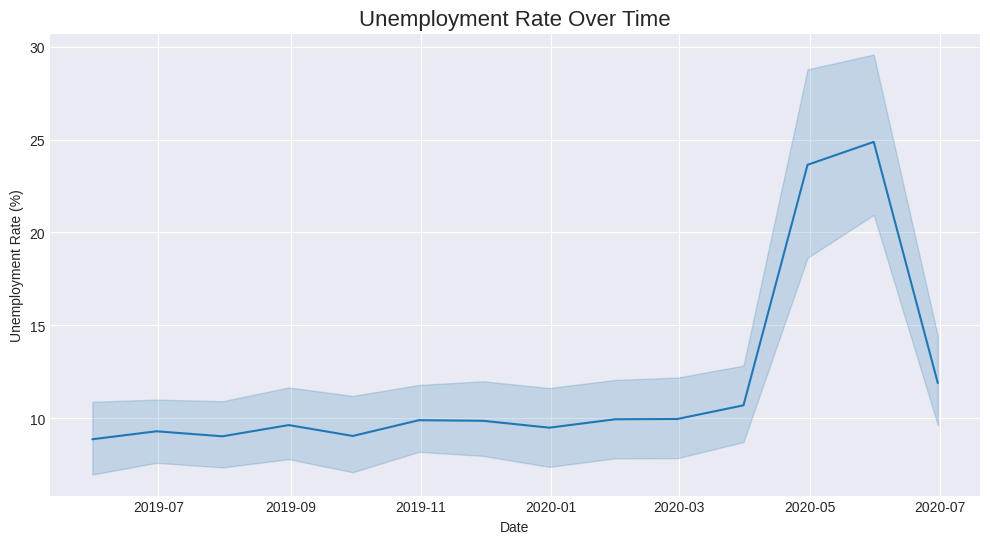

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='estimated_unemployment_rate_(%)')
plt.title("Unemployment Rate Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

In [23]:
pre_covid = df[df['date'] < '2020-03-01']['estimated_unemployment_rate_(%)'].mean()
post_covid = df[df['date'] >= '2020-03-01']['estimated_unemployment_rate_(%)'].mean()

print(f"Average Unemployment Rate before COVID: {pre_covid:.2f}%")
print(f"Average Unemployment Rate after COVID: {post_covid:.2f}%")

Average Unemployment Rate before COVID: 9.51%
Average Unemployment Rate after COVID: 17.77%


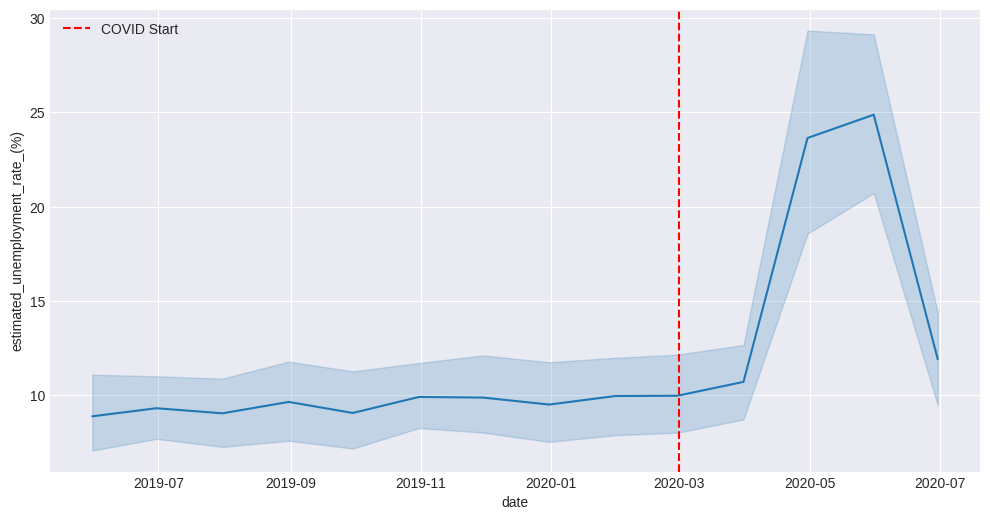

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='estimated_unemployment_rate_(%)')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID Start')
plt.legend()
plt.show()

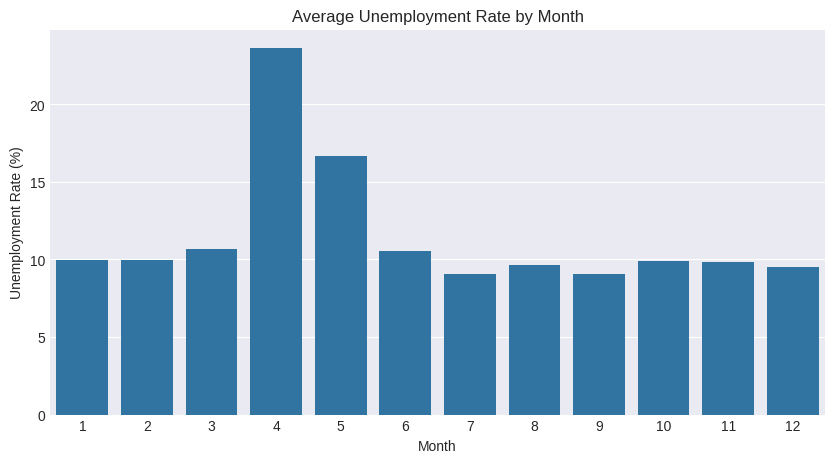

In [27]:
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')['estimated_unemployment_rate_(%)'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()